🚩**Name:  TJ Zhang**

**Email: tjzhang@u.boisestate.edu**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import scipy.stats as sps
%matplotlib inline

# Data and Setup (25%)

**load the data**

In [2]:
movies = pd.read_table('hetrec2011-movielens-2k-v2/movies.dat', sep='\t', na_values=['\\N'], encoding='latin1')
movies.head()

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,...,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,...,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,...,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,...,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,...,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...


In [38]:
ratings = pd.read_table('hetrec2011-movielens-2k-v2/user_ratedmovies.dat', sep='\t')
ratings.head()

,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,3,1.0,29,10,2006,23,17,16
1,75,32,4.5,29,10,2006,23,23,44
2,75,110,4.0,29,10,2006,23,30,8
3,75,160,2.0,29,10,2006,23,16,52
4,75,163,4.0,29,10,2006,23,29,30


**Replace the ‘0’s with missing (NA) value to encode unknown RottenTomatoes ratings**

In [4]:
movies.loc[movies['rtAllCriticsRating'] == 0, 'rtAllCriticsRating'] = np.nan
movies.loc[movies['rtTopCriticsRating'] == 0, 'rtTopCriticsRating'] = np.nan
movies.loc[movies['rtAudienceRating'] == 0, 'rtAudienceRating'] = np.nan

**The size & columns of the data set**

In [5]:
movies.count()

id                        10197
title                     10197
imdbID                    10197
spanishTitle              10197
imdbPictureURL            10016
year                      10197
rtID                       9886
rtAllCriticsRating         8441
rtAllCriticsNumReviews     9967
rtAllCriticsNumFresh       9967
rtAllCriticsNumRotten      9967
rtAllCriticsScore          9967
rtTopCriticsRating         4662
rtTopCriticsNumReviews     9967
rtTopCriticsNumFresh       9967
rtTopCriticsNumRotten      9967
rtTopCriticsScore          9967
rtAudienceRating           7345
rtAudienceNumRatings       9967
rtAudienceScore            9967
rtPictureURL               9967
dtype: int64

In [6]:
len(movies.columns)

21

# Comparing Ratings (25%)

**Compute the mean rating given to a movie by MovieLens users; I use movielenave_rating to represent it.**

In [39]:
movielen_rating=pd.DataFrame({'movielenave_rating' : ratings.groupby('movieID')['rating'].mean()}).reset_index()
movielen_rating.head()

,movieID,movielenave_rating
0,1,3.735154
1,2,2.976471
2,3,2.873016
3,4,2.577778
4,5,2.753333


**Join the movies and movielen_rating as moviess. However, I find the moviess.count() results are slightly changed compared to movies.count()**

In [8]:
moviess=movies.join(movielen_rating[['movieID','movielenave_rating']])
moviess.count()
#moviess=movielen_rating[['movieID','movielenave_rating']].join(movies.set_index('id'),on='movieID')

id                        10197
title                     10197
imdbID                    10197
spanishTitle              10197
imdbPictureURL            10016
year                      10197
rtID                       9886
rtAllCriticsRating         8441
rtAllCriticsNumReviews     9967
rtAllCriticsNumFresh       9967
rtAllCriticsNumRotten      9967
rtAllCriticsScore          9967
rtTopCriticsRating         4662
rtTopCriticsNumReviews     9967
rtTopCriticsNumFresh       9967
rtTopCriticsNumRotten      9967
rtTopCriticsScore          9967
rtAudienceRating           7345
rtAudienceNumRatings       9967
rtAudienceScore            9967
rtPictureURL               9967
movieID                   10109
movielenave_rating        10109
dtype: int64

**Describe the distributions of these four kind of ratings numerically**

In [9]:
moviess[['rtAllCriticsRating', 'rtTopCriticsRating', 'rtAudienceRating','movielenave_rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
rtAllCriticsRating,8441.0,6.068404,1.526898,1.2,5.000000,6.200000,7.200000,9.6
rtTopCriticsRating,4662.0,5.930330,1.534093,1.6,4.800000,6.100000,7.100000,10.0
rtAudienceRating,7345.0,3.389258,0.454034,1.5,3.100000,3.400000,3.700000,5.0
movielenave_rating,10109.0,3.213406,0.640538,0.5,2.851293,3.312415,3.681452,5.0


**Describe the distributions of these four kind of ratings graphically**

array([[<AxesSubplot:title={'center':'rtAllCriticsRating'}>,
        <AxesSubplot:title={'center':'rtTopCriticsRating'}>],
       [<AxesSubplot:title={'center':'rtAudienceRating'}>,
        <AxesSubplot:title={'center':'movielenave_rating'}>]],
      dtype=object)

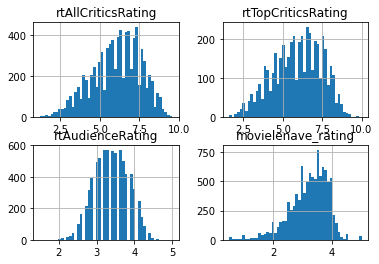

In [10]:
moviess[['rtAllCriticsRating', 'rtTopCriticsRating', 'rtAudienceRating','movielenave_rating']].hist(bins=50)

**Describe the distribution of the difference between the All Critics and Top Critics ratings for movies where both are defined numerically**

In [11]:
movies['diff_AC_TC_rating']=movies['rtAllCriticsRating']-movies['rtTopCriticsRating']
movies['diff_AC_TC_rating'].describe()

count    4662.000000
mean        0.094123
std         0.549673
min        -2.200000
25%        -0.200000
50%         0.100000
75%         0.400000
max         3.200000
Name: diff_AC_TC_rating, dtype: float64

**Describe the distribution of the difference between the All Critics and Top Critics ratings for movies where both are defined graphically**

<AxesSubplot:>

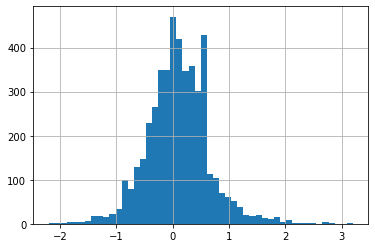

In [12]:
movies['diff_AC_TC_rating'].hist(bins=50)

**NULL Hypothesis: There is no difference between the ratings given to movies by all critics and those given by top critics**

In [13]:
scipy.stats.ttest_rel(moviess['rtAllCriticsRating'],moviess['rtTopCriticsRating'],nan_policy='omit' )

Ttest_relResult(statistic=11.691646881769836, pvalue=3.8130588929989856e-31)

*Because pvalue<0.05, we refuse the null hypothesisthe, which means there is a difference between the ratings given to movies by all critics and those given by top critics.*

**NULL Hypothesis: There is no difference between the average audience rating RottenTomatoes users give to a movie and the mean rating MovieLens users give to it**

In [14]:
scipy.stats.ttest_rel(moviess['rtAudienceRating'],moviess['movielenave_rating'],nan_policy='omit' )

Ttest_relResult(statistic=20.429461648006164, pvalue=2.9641288118909876e-90)

*Because pvalue<0.05, we refuse the null hypothesisthe, which means there is a difference between the average audience rating RottenTomatoes users give to a movie and the mean rating MovieLens users give to it.*

🚩Consider: why is the paired t-test the appropriate test here?


**Because it is comparing the difference between two variables for a common subject.**

# Confidence Intervals (25%)

✅ For each of the 20 genres, compute the mean and a 95% confidence interval for the all-critic ratings using the standard error method. 

In [15]:
rng = np.random.default_rng(20200913)

In [16]:
def mean_estimate(vals):
    # vals is a series of measurements of a single variable
    mean = vals.mean()
    se = vals.sem()  # Pandas has an SEM function too.
    
    ci_width = 1.96 * se
    return pd.Series({
        'mean': mean,
        'count': vals.count(),
        'ci_width': ci_width,
        'ci_min': mean - ci_width,
        'ci_max': mean + ci_width
    })

In [17]:
movie_genres=pd.read_table('hetrec2011-movielens-2k-v2/movie_genres.dat', sep='\t', na_values=['\\N'], encoding='latin1')

In [18]:
Greness1=movie_genres.join(movies[['id','rtAllCriticsRating']].set_index('id'),on='movieID')
Greness=Greness1.groupby('genre')['rtAllCriticsRating'].apply(mean_estimate).unstack()
Greness.sort_values(by = 'mean',ascending=False)

,mean,count,ci_width,ci_min,ci_max
genre,,,,,
Film-Noir,7.253543,127.0,0.221494,7.032049,7.475038
Documentary,7.129641,334.0,0.105010,7.024631,7.234651
IMAX,6.950000,16.0,0.366246,6.583754,7.316246
War,6.753351,388.0,0.134805,6.618545,6.888156
Western,6.613472,193.0,0.196672,6.416800,6.810143
Musical,6.483573,347.0,0.138817,6.344756,6.622391
Drama,6.462657,4306.0,0.039939,6.422718,6.502596
Animation,6.343404,235.0,0.178157,6.165247,6.521561
Mystery,6.228571,434.0,0.140044,6.088528,6.368615


🚩Does it look like the top two genres have different mean critic ratings? 

The top two genres are Film-Noir and Documentary. The 95% CI of mean critic ratings of Film-Noir is (7.032049,7.475038);The 95% CI of mean critic ratings of Documentary is (7.024631,7.234651). It looks like the top two genres have similar mean critic ratings. 

🚩Does it look like the top and bottom genres have different mean critic ratings?

The top genres is Film-Noir, the 95% CI of mean critic ratings is (7.032049,7.475038); the bottom genres is Horror (because the count of Short is 0) whose 95% CI of mean critic ratings is (5.358915,5.583176). It looks like the top and bottom fenres have different mean critic ratings.

In [19]:
scipy.stats.ttest_rel(moviess['rtAudienceRating'],moviess['movielenave_rating'],nan_policy='omit' )

Ttest_relResult(statistic=20.429461648006164, pvalue=2.9641288118909876e-90)

In [20]:
def boot_mean_estimate(vals, nboot=10000):
    obs = vals.dropna()  # ignore missing values
    mean = obs.mean()
    n = obs.count()
    
    boot_means = [np.mean(rng.choice(obs, size=n)) for i in range(nboot)]
    ci_low, ci_high = np.quantile(boot_means, [0.025, 0.975])
    return pd.Series({
        'mean': mean,
        'count': n,
        'ci_low': ci_low,
        'ci_high': ci_high
    })

In [21]:
boot_Greness=Greness1.groupby('genre')['rtAllCriticsRating'].apply(boot_mean_estimate).unstack()
boot_Greness.sort_values(by = 'mean',ascending=False)

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,count,ci_low,ci_high
genre,,,,
Film-Noir,7.253543,127.0,7.029921,7.467717
Documentary,7.129641,334.0,7.020951,7.235030
IMAX,6.950000,16.0,6.606250,7.306250
War,6.753351,388.0,6.618557,6.887113
Western,6.613472,193.0,6.412435,6.805699
Musical,6.483573,347.0,6.345814,6.621909
Drama,6.462657,4306.0,6.422734,6.502323
Animation,6.343404,235.0,6.167660,6.519574
Mystery,6.228571,434.0,6.088249,6.367972


🚩Does this look the same as the standard error CIs?

It looks similar to the standard error CIs, but it is not the same.

# Popularity and Bootstraps (20%)

**Number of MovieLens users who have rated each movie.**

In [22]:
numofrating=ratings.groupby('movieID')['userID'].agg(['count'])
numofrating=numofrating.rename(columns={'count':'number of rating'})
numofrating

,number of rating
movieID,
1,1263
2,765
3,252
4,45
5,225
...,...
65088,1
65091,1
65126,2


**Median number of ratings for movies in each of these genres**

In [23]:
genres_rating=movie_genres.join(numofrating)
genres_rating.groupby('genre')['number of rating'].agg(['count','median'])

,count,median
genre,,
Action,564,26.0
Adventure,415,30.0
Animation,112,35.5
Children,263,27.0
Comedy,1419,20.0
Crime,367,23.0
Documentary,126,21.5
Drama,1854,24.0
Fantasy,191,21.0


 **Null hypothesis: Action movies and documentaries have the same median number of ratings**

In [24]:
actions=genres_rating[genres_rating['genre']=='Action']
documentarys=genres_rating[genres_rating['genre']=='Documentary']

In [25]:
def boot_ind(s1, s2, nboot=10000):
    ## we will ignore NAs here
    obs1 = s1.dropna()
    obs2 = s2.dropna()
    n1 = len(obs1)
    n2 = len(obs2)
    
    ## pool the observations together
    pool = pd.concat([obs1, obs2])
    ## grab the observed median
    md = np.median(obs1) - np.median(obs2)
    
    ## compute our bootstrap samples of the median under H0
    b1 = np.array([np.median(rng.choice(pool, size=n1)) for i in range(nboot)])
    b2 = np.array([np.median(rng.choice(pool, size=n2)) for i in range(nboot)])
    
    ## the P-value is the probability that we observe a difference as large
    ## as we did in the raw data, if the null hypothesis were true
    return md, np.median(np.abs(b1 - b2) >= np.abs(md))

In [26]:
boot_ind(documentarys['number of rating'], actions['number of rating'],nboot=10000)

(-4.5, 0.0)

**Because P-value is very small, we have to reject this null hypothesis.**

🚩What if you use the # of audience ratings from RottenTomatoes instead of the # of MovieLens ratings?

In [27]:
genres_AUrating=movie_genres.join(movies[['id','rtAudienceNumRatings']].set_index('id'),on='movieID')
genres_AUrating

,movieID,genre,rtAudienceNumRatings
0,1,Adventure,102338.0
1,1,Animation,102338.0
2,1,Children,102338.0
3,1,Comedy,102338.0
4,1,Fantasy,102338.0
...,...,...,...
20804,65126,Comedy,13893.0
20805,65126,Drama,13893.0
20806,65130,Drama,46044.0
20807,65130,Romance,46044.0


In [28]:
genres_AUrating.groupby('genre')['rtAudienceNumRatings'].agg(['count','median'])

,count,median
genre,,
Action,1409,5353.0
Adventure,984,4682.5
Animation,276,8415.5
Children,515,5413.0
Comedy,3494,1885.5
Crime,1062,2466.5
Documentary,413,487.0
Drama,4955,1451.0
Fantasy,528,7291.5


In [29]:
AUactions=genres_AUrating[genres_AUrating['genre']=='Action']
AUdocumentarys=genres_AUrating[genres_AUrating['genre']=='Documentary']
AUactions

,movieID,genre,rtAudienceNumRatings
14,6,Action,42785.0
21,9,Action,3626.0
22,10,Action,28260.0
33,15,Action,3350.0
45,20,Action,5263.0
...,...,...,...
20742,64614,Action,193304.0
20755,64900,Action,0.0
20766,64921,Action,0.0
20791,64997,Action,162092.0


 **Null hypothesis: Action movies and documentaries have the same median number of ratings from RottenTomatoes**

In [30]:
boot_ind(AUdocumentarys['rtAudienceNumRatings'], AUactions['rtAudienceNumRatings'])

(-4866.0, 0.0)

**Because P-value is very small, we have to reject this null hypothesis.**

✅ Compare the mean of the critic ratings (using the All Critics ratings from Rotten Tomatoes) between action and documentary movies. 

In [31]:
movies[['id','rtAllCriticsRating']]

,id,rtAllCriticsRating
0,1,9.0
1,2,5.6
2,3,5.9
3,4,5.6
4,5,5.3
...,...,...
10192,65088,4.4
10193,65091,7.0
10194,65126,5.6
10195,65130,6.7


In [32]:
genres_ACrating=movie_genres.join(movies[['id','rtAllCriticsRating']].set_index('id'),on='movieID')
genres_ACrating

,movieID,genre,rtAllCriticsRating
0,1,Adventure,9.0
1,1,Animation,9.0
2,1,Children,9.0
3,1,Comedy,9.0
4,1,Fantasy,9.0
...,...,...,...
20804,65126,Comedy,5.6
20805,65126,Drama,5.6
20806,65130,Drama,6.7
20807,65130,Romance,6.7


In [33]:
genres_ACrating.groupby('genre')['rtAllCriticsRating'].agg(['count','mean'])

,count,mean
genre,,
Action,1192,5.574497
Adventure,817,5.952876
Animation,235,6.343404
Children,442,5.779864
Comedy,3030,5.732409
Crime,943,6.161612
Documentary,334,7.129641
Drama,4306,6.462657
Fantasy,458,6.023362


In [34]:
ACactions=genres_ACrating[genres_ACrating['genre']=='Action']
ACdocumentarys=genres_ACrating[genres_ACrating['genre']=='Documentary']

**Null hypothesis: Action movies and documentaries have the same mean of the critic rating.**

In [35]:
sps.ttest_ind(ACdocumentarys['rtAllCriticsRating'], ACactions['rtAllCriticsRating'], nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=22.185618813162428, pvalue=1.748825424429425e-86)

**Because P-value <0.05, we have to reject this null hypothesis. This means Action movies and documentaries do not have the same mean of the critic rating.**

In [36]:
def boot_indm(s1, s2, nboot=10000):
    ## we will ignore NAs here
    obs1 = s1.dropna()
    obs2 = s2.dropna()
    n1 = len(obs1)
    n2 = len(obs2)
    
    ## pool the observations together
    pool = pd.concat([obs1, obs2])
    ## grab the observed median
    md = np.mean(obs1) - np.mean(obs2)
    
    ## compute our bootstrap samples of the median under H0
    b1 = np.array([np.mean(rng.choice(pool, size=n1)) for i in range(nboot)])
    b2 = np.array([np.mean(rng.choice(pool, size=n2)) for i in range(nboot)])
    
    ## the P-value is the probability that we observe a difference as large
    ## as we did in the raw data, if the null hypothesis were true
    return md, np.mean(np.abs(b1 - b2) >= np.abs(md))

In [37]:
boot_indm(ACdocumentarys['rtAllCriticsRating'], ACactions['rtAllCriticsRating'],nboot=1000)

(1.5551440742675675, 0.0)

**Because P-value is very small, we have to reject this null hypothesis. This means Action movies and documentaries do not have the same mean of the critic rating.**

# Reflection (5%)

There is a difference between the ratings given to movies by all critics and those given by top critics. Also, there is a difference between the average audience rating RottenTomatoes users give to a movie and the mean rating MovieLens users give to it.

For different kind of genres, their popularity is different. Action movies are more popular than documentary movies. However, it is interesting to find that the documentary movies have a larger mean of critic rating than action movies. 